<a href="https://colab.research.google.com/github/tlysenko/bionformatics-coursera-sandiego/blob/main/Finding%20Hidden%20Messages%20in%20DNA%20(Bioinformatics%20I)/Bioinformatics_1_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import itertools

import urllib.request

import time

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

## 1.3 Give all values of Skew_i (GAGCCACCGCGATA) for i ranging from 0 to 14.



In [ ]:
def CalculateSkew(genome):
  r = len(genome) + 1
  d = {'A':0, 'C':-1, 'G':1, 'T':0}
  skew = [0] * r 
  for i in range(1, r):
    skew[i] = skew[i-1] + d[genome[i-1]]
  skew = np.array(skew)
  return skew
def PlotSkew(skew):
  plt.figure(figsize=(10,5))
  ax = sns.lineplot(x=range(len(skew)),y=skew);
  ax.set(xlabel='position', ylabel='Skew (C-G)', title='Skew diagram')
  plt.show()
  return 

In [ ]:
genome = 'CATGGGCATCGGCCATACGCC'
skew = CalculateSkew(genome)
skew

array([ 0, -1, -1, -1,  0,  1,  2,  1,  1,  1,  0,  1,  2,  1,  0,  0,  0,
        0, -1,  0, -1, -2])

In [ ]:
len(skew), len(genome)

(22, 21)

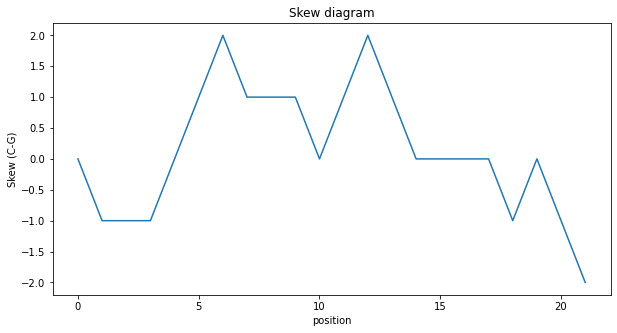

In [ ]:
PlotSkew(skew)

## 1.3 Code Challenge: Solve the Minimum Skew Problem.

Input: A DNA string Genome.

Output: All integer(s) i minimizing Skewi (Genome) among all values of i (from 0 to |Genome|).


#### Example 1

In [ ]:
genome = 'TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT'
len(genome)

60

In [ ]:
def SkewMin(skew):
  return np.where(skew == skew.min())

In [ ]:
s = CalculateSkew(genome)

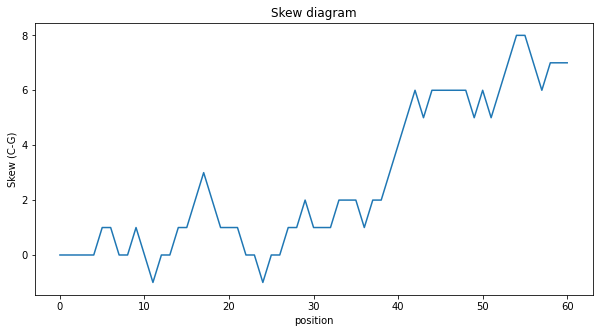

In [ ]:
PlotSkew(s)

In [ ]:
SkewMin(s)

(array([11, 24]),)

#### Example 2

In [ ]:
url = 'http://bioinformaticsalgorithms.com/data/extradatasets/replication/minimum_skew.txt'
response = urllib.request.urlopen(url)
data = response.read().decode('ascii')

In [ ]:
genome=data.split('\r')[1].split('\n')[1]

In [ ]:
answers=data.split('\r')[3].split('\n')[1:]
answers 

['89969 89970 89971 90345 90346']

In [ ]:
s = CalculateSkew(genome)
SkewMin(s)

(array([89969, 89970, 89971, 90345, 90346]),)

### Example 3

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset_7_6-2.txt to dataset_7_6-2.txt
User uploaded file "dataset_7_6-2.txt" with length 92888 bytes


In [ ]:
with open(fn) as f:
  genome = f.readline().split('\n')[0]
len(genome)

92887

In [ ]:
genome[-20:]

'GCACCGAAGAATGGCATATA'

In [ ]:
s = CalculateSkew(genome)
a = SkewMin(s)

In [ ]:
#Stepik submission string
st=''
for i, el in enumerate(a[0]):
  st = st + str(el) + ' '
st

'90506 90507 '

## 1.3 E-coli Skew diagram

In [ ]:
url = 'http://bioinformaticsalgorithms.com/data/realdatasets/Rearrangements/E_coli.txt'
response = urllib.request.urlopen(url)
genome = response.read().decode('ascii')

len(genome)

4639675

In [ ]:
def CalculateSkewStep(genome, step):
  r = len(genome) + 1
  skew = [0]
  for i in range(0,r,step):     
    subs = genome[0:i+step]    
    skew.append(Counter(subs)['G'] - Counter(subs)['C'])
  return skew

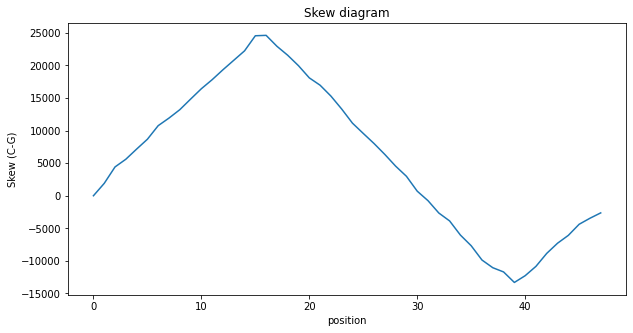

In [ ]:
skew = CalculateSkewStep(genome, 100000)
PlotSkew(skew)

In [ ]:
skew = CalculateSkew(genome)
SkewMin(skew)

(array([3923620, 3923621, 3923622, 3923623]),)

## 1.4 Hamming Distance Problem: Compute the Hamming distance between two strings.

Input: Two strings of equal length.

Output: The Hamming distance between these strings.

In [ ]:
def HammingtonDistance(genome1, genome2):
  return np.sum([x1!=x2 for x1, x2 in zip(genome1, genome2)])

#### Example 1

In [ ]:
g1 = 'GGGCCGTTGGT'
g2 = 'GGACCGTTGAC'
HammingtonDistance(g1, g2)

3

#### Example 2

In [ ]:
g1='CCGAAGCAATTGAAACCCCCCCGGCCTGGGAGGCGCAAAAATCTGACCTCTTTGTGAGTTGACCACTTAATTTATGTCTGACCACGAGAAGGGCTACTGATTTGGTACGTCGGGTCATGACCCCCAGTTCTTAGCCGCCTGCTCCAATCTCTGACTTGTTTATCGAGGGGATGGAGTAACGAAATGCGATTCGCCCGCTCAGGCCAAGGTATATATTTGAGTAGCGGAAGGTTGCACTACCTACAACCACGGCACACCGGCACGTTGTCGTGCCCTGGCGGCCTGCGCACTTTCGCCACTGTCAAGTACGACTTCCCAAGCTCAACCAACATTCATAATCCGGTGCAATTCATACCGTATCATCGTGCTATAAGCGACGCCGATTCTCGGGGCCTGATAATTGAGACTGGACTACATAGTGGGTGCCCTCTCTGCGAGTAAGTGACGGAACAACGGAGATCAGGGACCAAATGGTAGCAAAACAGATCGAGGTACACGCAGGTAGCTGTCCGTGGAGTAGACCGCGCTTAGCGTCTGTTAGAGTATCATCGGGGTATTAGACACAGGAACCTCTATGCTGTTAAAAGGCCATACCCCGTAATTGTGCAAATTTGTTACGTTCAAATCTACGCAGTGAGGGTCCTAAGGTGATGGCAGGGATTGGAACTTCTCCGCTGGCTCTTAGATTACTTAGCCAGTCTACCCTCGAAGATACAAATCCTTCCACCAGAGGGAGCTCATTGAAATTCATTCCATGCTACTCGACCGCGCGTATGGGTGCGGGGCTCTATGGGATCTAACTCGATCCTTCAGAGTCCTTATTCAAATGCATTTCCGTCCCCGTATGTTTCGACGAAGCCGAAGCCCAAACCCTGGGATGGACGAATTAAGGACAGTACAGGCAATAGTGTTCTCCCATACTCGGAACAGACGCCTCATTTTTTCGCGAAATCGATCTGGGTTGGAAGAAGTTCCAGTGCAGAGTTCCTATCACACAATTCGTTCTCGGGGCTTCCGGCCCATAAGCGATACTACTGTCTTTGCGAGCTAACGATTACATTCGGGGGAACTTAGCTCGGACTGGACCAGGTACATGATCCAAAGCGCGATGTCTGTCTGTTACCCTCACCGCCGCTCTTTTATCGGGTA'
g2 = 'GCGTAGTAGGTTCGCGTACCTAGTTCCGCCGAAAAGACAAAGGAGAAGGGAATGCTCCTAGTAGTTTCAGTCTAGCAAACATGTTATAACGCTAACTGTGTGCTGCAAAAAGGATTTGAACCCAAATTTTAAAGCGCTGATCGACAGAACGCTGTTGAAGAGGCGATGGTACTGAGATTCCCCAGAAACCACCTCCGCGCTATGTGCTCAAGACAACCCGCATTCGTTTTTACTAGATTTGGAGCCGAGTTGTGATTTGGATATTTTCACATAAGACCGAGCAGGAAATATACCTTGTTGCAGCTATTGACCCCGTTCTCTCGGAAATCCATGGAATAGTCTTCGGATATTCGTACCAATGGGCGCGATGTTGCGATAAGAGAGCACATTTCATTAAGTGGTGCTCCGCCGCTAAGATGGGAAGGGGCGAGTCTATCGCAGCATCGAAGGCTGAGTTGGCCATTGCCGAGAGTATACATATTTACGATCACACTCGCATAGTCCCACGCATTACGTCCGAGATAGTATGTCCCAATGCAACCTAAAGCCGCGAGATTCCCTAAGGAGAAAATTAAACACTGGAAATTAGGTGATGCTACATCCCATGGACACTTTCGGAACAATATCGGTGACACACATCATCCGTGATCCCGTGATATTTCATCCATGGAGAGAGTATGGTTTTACTACACCTGGTCTAGGCCAAGCCTAACCCCCTGTTCATCCGTTTTATACGAGTATTACCTTGACGACCATAGAGGATAGACTCGGTATCCCGCACACTCTACACACACGACTTAATCCGCTCCACGACCTTCCTAGCGATCTTTGGCGCAGCCGGTTCGCGTATTTTACGACCAACTCGATGGATCCCAATTATCCCCCTGGTAGTGCCCCTCCGCCTGAGAATTCGACGGGCGAGGTCCGGGGGACCGACATAGAGTGGAATGCTTCTTTCCGGGATAACACGTGATTGACATAAAAATGTAGGGCAGATAGGCATCGTTAGCACCTCTCTCCTTGCTGCACTGCGTTTATCGATCGAATTCAAGACTTGTGCATGTTGAAAACAACCTCGCGTTATCCCTGCTATTTGCTTCAGAGCCGTAGGAGGGGACCATGCGTGAGTCCTCCTGAGCAACCTCAATT'
HammingtonDistance(g1, g2)

844

#### Example 3

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset_9_3.txt to dataset_9_3.txt
User uploaded file "dataset_9_3.txt" with length 2050 bytes


In [ ]:
with open(fn) as f:
  genome1 = f.readline().split('\n')[0]
  genome2 = f.readline().split('\n')[0]

In [ ]:
genome1

'CTCTTCGAAAAGCTCACCGCATAATACACAATAATCTACAGTTCATCGTCTTACCGGAGAATGCTATCGCAAGCAGTTCTGTAATACGCGGTTTGAAGCCGACGGCGCAGTGTGTATGTTAATTGTATGCTCTGAGACTTTTGGACCGAGCGAAAAAGATGCTGCTGTGTGGATGCTTCCACACTTAAATAGTGTGCGACGGTCCAGCGTGAAGGGATGCCCTACGATATGATTAGCTCAAAGTCCTACAAAATAATACTTTTCCTTTCTACTCCCCTGGCGGTCCACTTTTGGCGTCATCGAGAAATCCCGGACAGATCGCCACGCTCGATGGCGTCGTTGTGACGATTATGGTTTACGCTTGCGCGATGCGTCACGCTTGTCAAACTTCTGATCTGAGCAAACAGGACAAAAATGTTGGGATTTGAACGTGCTAGGGACAGTAGTACAAAGTAAGATACGATAGACCTGACGCTTGCGTGTAGATTGGGGGAGGCAAACCACCAAGTGTCGAACCCAGCGGCCGAAATGCATCGCTGGTTGATGTCCAAACGTATCTCACGCAATGGTAGCAACCATGAAACCCTGCCACGAACATAATCCTCGAGATACTTTCCGAGTTGGACTGATTAATAAGGCGGGTAACTGGATAGTAGAGGTCCGCGGACACGACGGGGCCAGGGTGTATCAATTTTTTTGCATTCCACAGTCACCTCAATCGGGCCCGCGCCGGTGAGCGAAGGATTCCTTACATCTCTTTCCAACGGACTCAGGTTATTCGCATCTATGTTGGCGAGTTCACGTGTACATGAAACCTTCTGTTCATAAGCGCGATGTCGCGCATACAGTGAGCACTGATAATAGATTTATAAAGGCAGGGGAGTCAGGGAGGCATATAGACCTAAGTATTGGTTATCGAAGATGATTCGCTAGGCAATTAGGAGTAGGGGAACTCGTAAGTCTTTCGCAAACGACCCGCAGCGCCTCGCTCCGATACTT

In [ ]:
HammingtonDistance(genome1, genome2)

781

#### 1.4 Approximate Pattern Matching Problem: Find all approximate occurrences of a pattern in a string.

Input: Strings Pattern and Text along with an integer d.

Output: All starting positions where Pattern appears as a substring of Text with at most d mismatches.

In [ ]:
def ApproxPatternMatch(pattern, genome, d):
  idx = []
  p_len = len(pattern)
  g_len = len(genome) - p_len + 1

  for i in range(0, g_len):
    dist = HammingtonDistance(pattern, genome[i:i+p_len])
    #print(i, dist)
    if dist<=d :
      idx.append(i)
  return idx

#### Example 1

In [ ]:
pattern = 'ATTCTGGA'
genome = 'CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAAT'
d = 3
ApproxPatternMatch(pattern, genome, d)

#### Example 2 

In [ ]:
url = 'http://bioinformaticsalgorithms.com/data/extradatasets/replication/approximate_match.txt'
response = urllib.request.urlopen(url)
data = response.read().decode('ascii')

In [ ]:
pattern = data.split('\r')[1].split('\n')[1]
genome = data.split('\r')[2].split('\n')[1]
d = int(data.split('\r')[3].split('\n')[1])
correct_output = data.split('\r')[5].split('\n')[1]

In [ ]:
output = ApproxPatternMatch(pattern, genome, d)

In [ ]:
st = ''
for i in range(len(output)):
  st = st + str(output[i]) + ' '

In [ ]:
sum([x!=y for x,y in zip(st,correct_output)])

0

### Example 3

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset_9_4-3.txt to dataset_9_4-3.txt
User uploaded file "dataset_9_4-3.txt" with length 19308 bytes


In [ ]:
with open(fn) as f:
  pattern = f.readline().split('\n')[0]
  genome = f.readline().split('\n')[0]
  d = int(f.readline().split('\n')[0])

In [ ]:
output = ApproxPatternMatch(pattern, genome, d)

In [ ]:
st = ''
for i in range(len(output)):
  st = st + str(output[i]) + ' '
st

'2 6 7 11 16 23 28 50 61 63 64 66 80 81 86 87 97 99 100 105 109 111 113 117 122 123 130 137 144 146 148 153 158 167 170 173 176 185 186 187 188 191 192 201 202 204 214 215 217 218 219 227 232 234 245 246 250 251 259 260 264 267 272 273 274 277 285 286 298 300 301 306 309 318 323 337 341 342 348 353 355 356 359 364 370 375 376 377 380 381 382 387 388 395 399 405 406 409 421 422 427 431 445 446 448 454 460 468 469 477 480 483 492 493 497 509 510 515 516 517 518 520 525 530 534 539 541 542 543 544 547 554 557 563 568 570 577 579 582 586 589 595 606 621 626 627 631 635 637 638 643 650 655 660 666 671 672 674 683 684 692 694 697 699 700 702 709 711 712 714 718 723 725 729 730 734 735 742 744 748 751 756 767 769 774 780 788 790 792 794 803 805 810 812 813 824 831 832 840 862 872 880 882 885 886 891 892 895 897 901 911 915 916 918 924 925 935 942 945 949 950 965 968 977 980 985 990 995 998 1007 1014 1015 1016 1017 1018 1024 1025 1034 1038 1039 1040 1045 1046 1047 1051 1052 1055 1060 1065 1070

## 1.4 Code Challenge: Implement ApproximatePatternCount.

Input: Strings Pattern and Text as well as an integer d.

Output: Countd(Text, Pattern).

In [ ]:
def ApproximatePatternCount(genome, pattern, d):
  p_len = len(pattern)
  g_len = len(genome) - p_len + 1
  cnt = 0

  for i in range(0, g_len):
    dist = HammingtonDistance(pattern, genome[i:i+p_len])
    
    if dist<=d :
      cnt +=1
  return cnt

In [ ]:
genome = 'AACAAGCTGATAAACATTTAAAGAG'
pattern = 'AAAAA'
d = 2
ApproximatePatternCount(genome, pattern, d)

11

In [ ]:
pattern = 'GAGG'
genome = 'TTTAGAGCCTTCAGAGG'
d = 2
ApproximatePatternCount(genome, pattern, d)

4

#### Stepik submission

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset_9_6.txt to dataset_9_6.txt
User uploaded file "dataset_9_6.txt" with length 370 bytes


In [ ]:
with open(fn) as f:
  pattern = f.readline().split('\n')[0]
  genome = f.readline().split('\n')[0]
  d = int(f.readline().split('\n')[0])

In [ ]:
ApproximatePatternCount(genome, pattern, d)

31

## 1.4 Frequent Words with Mismatches Problem: Find the most frequent k-mers with mismatches in a string.

Input: A string Text as well as integers k and d. (You may assume k ≤ 12 and d ≤ 3.)

Output: All most frequent k-mers with up to d mismatches in Text.

In [3]:
def CreateKmerList(k):
  kmer_list = list(itertools.product('ACGT', repeat = k))
  l_kmer = len(kmer_list)

  kmer_new = []
  for i in range(l_kmer):
    elem = ''
    for j in range(k):
      elem += kmer_list[i][j]
    kmer_new.append(elem)
  return kmer_new

def HammingtonDistance(genome1, genome2):
  return np.sum([x1!=x2 for x1, x2 in zip(genome1, genome2)])

def ApproximatePatternCount(genome, pattern, d):
  p_len = len(pattern)
  g_len = len(genome) - p_len + 1
  cnt = 0

  for i in range(0, g_len):
    dist = HammingtonDistance(pattern, genome[i:i+p_len])
    
    if dist<=d :
      cnt +=1
  return cnt

def GetFreqKmers(genome, d, k):
  kmer_list = CreateKmerList(k)
  freq_kmers = {}

  for kmer in kmer_list: 
    freq = ApproximatePatternCount(genome, kmer, d)
    if freq > 0:
      freq_kmers[kmer] = freq
  return [k for k,v in freq_kmers.items() if v == max(freq_kmers.values())]

In [ ]:
genome = 'ACGTTGCATGTCGCATGATGCATGAGAGCT'
k = 4
d = 1
GetFreqKmers(genome, d, k)

['ATGC', 'ATGT', 'GATG']

#### Stepik submission

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset_9_7.txt to dataset_9_7.txt
User uploaded file "dataset_9_7.txt" with length 388 bytes


In [ ]:
with open(fn) as f:
  genome = f.readline().split('\n')[0]
  kd = f.readline().split('\n')[0].split(' ')
  k = int(kd[0])
  d = int(kd[1])

In [ ]:
ll = GetFreqKmers(genome, d, k)

st = ''
for el in ll:
  st = st + str(el)+' '
st.strip()

'TTGTGTG'

## 1.4 Frequent Words with Mismatches and Reverse Complements Problem: Find the most frequent k-mers (with mismatches and reverse complements) in a string.

Input: A DNA string Text as well as integers k and d.

Output: All k-mers Pattern maximizing the sum Countd(Text, Pattern)+ Countd(Text, Patternrc) over all possible k-mers.

In [13]:
def HammingtonDistance(genome1, genome2):
  return np.sum([x1!=x2 for x1, x2 in zip(genome1, genome2)])

def ApproximatePatternCount(genome, pattern, d):
  p_len = len(pattern)
  g_len = len(genome) - p_len + 1
  cnt = 0

  for i in range(0, g_len):
    dist = HammingtonDistance(pattern, genome[i:i+p_len])
    
    if dist<=d :
      cnt +=1
  return cnt
def ReverseComplement(pattern): 
  d = {'G':'C', 'C':'G', 'T':'A', 'A':'T'}
  lst = [d[el] for el in pattern[::-1]]
  st=''
  return st.join(lst)

In [6]:
def PatternToNumer(pattern):
  d = {'A':0,'C':1,'G':2,'T':3}
  if len(pattern) == 0:
    num = 0
  else:
    symb = pattern[-1]
    pref = pattern[:-1]
    num = 4 * PatternToNumer(pref) + d[symb]
  return num

s = 'AGT'
PatternToNumer(s)
def NumberToSymbol(num):
  d = {0:'A', 1:'C', 2: 'G', 3: 'T'}
  return d[num]
def NumberToPattern(index, k):
  if k == 1:
    pattern = NumberToSymbol(index)
  else:
    prefixIndex = index // 4
    r = index % 4
    symb = NumberToSymbol(r)
    prefixPattern = NumberToPattern(prefixIndex, k-1)
    pattern = prefixPattern + symb
  return pattern

NumberToPattern(9904, 7)

'GCGGTAA'

In [69]:
def GetFreqWordsMismReverse(genome, d, k):
  l = 4**k
  kmers_lst = []
  kmers_idx = range(l)
  kmers_freq = np.zeros(l)
  kmers_flag = [False] * l 
  for i in range(l):
    kmers_lst.append(NumberToPattern(i,k))
  for i in range(l):
    if kmers_flag[i] == False:
      kmer = kmers_lst[i]
      f1 = ApproximatePatternCount(genome, kmer, d)
      reversed_kmer = ReverseComplement(kmer)
      f2 = ApproximatePatternCount(genome, reversed_kmer, d)
      kmers_freq[i] = f1+f2

      i2 = PatternToNumer(reversed_kmer)
      kmers_freq[i2] = f1+f2

      kmers_flag[i] = True
      kmers_flag[i2] = True

  max_value = max(kmers_freq)
  answer = [NumberToPattern(i,k) for i in np.where(kmers_freq==max_value)[0]]
  return answer

#### Example 1 

In [68]:
dgenome = 'ACGTTGCATGTCGCATGATGCATGAGAGCT'
k = 4 
d = 1 
GetFreqWordsMismReverse(genome, d, k)

['ACAT', 'ATGT']

### Example 2

In [70]:
url = 'http://bioinformaticsalgorithms.com/data/extradatasets/replication/frequent_words_mismatch_complements.txt'
response = urllib.request.urlopen(url)
data = response.read().decode('ascii')

genome = data.split('\r')[1].split('\n')[1]
correct_answer = data.split('\r')[4].split('\n')[1]
k = 9
d = 3

output = GetFreqWordsMismReverse(genome, d, k)
output

['AGCGCCGCT', 'AGCGGCGCT']

### Stepik submission

In [88]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset_9_8-2.txt to dataset_9_8-2.txt
User uploaded file "dataset_9_8-2.txt" with length 226 bytes


In [89]:
with open(fn) as f:
  genome = f.readline().split('\n')[0]
  lst = list(f.readline().split('\n')[0])
  k = int(lst[0])
  d = int(lst[2])

In [90]:
GetFreqWordsMismReverse(genome, d, k)

['AAATT', 'AATTT', 'ATATA', 'TATAT']